In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [227]:
car_df=pd.read_csv('car_evaluation.csv', index_col=False)
car_df.head()
car_df.info()
car_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [228]:
car_df.value_counts()

buying  maint  doors  persons  lug_boot  safety  class
high    high   2      2        big       high    unacc    1
med     med    4      4        med       med     acc      1
                      more     small     low     unacc    1
                                         high    acc      1
                               med       med     acc      1
                                                         ..
low     low    3      2        med       med     unacc    1
                                         low     unacc    1
                                         high    unacc    1
                               big       med     unacc    1
vhigh   vhigh  5more  more     small     med     unacc    1
Name: count, Length: 1728, dtype: int64

In [229]:
car_df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [231]:
#Label encoding
le = LabelEncoder()
#car_df[col] = le.fit_transform(car_df['class'])

for col in car_df.columns:
    car_df[col] = le.fit_transform(car_df[col])

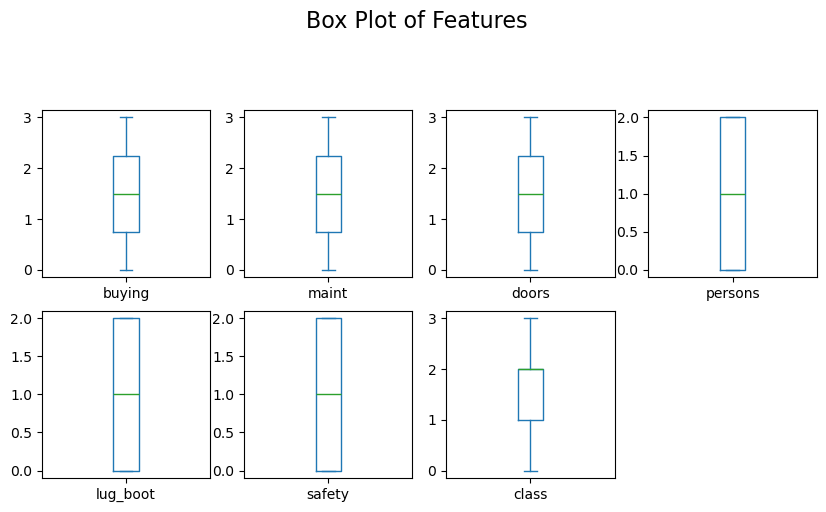

In [232]:
data_mean = car_df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=10, figsize=(10,10));
plt.suptitle('Box Plot of Features', fontsize=16)
plt.show()

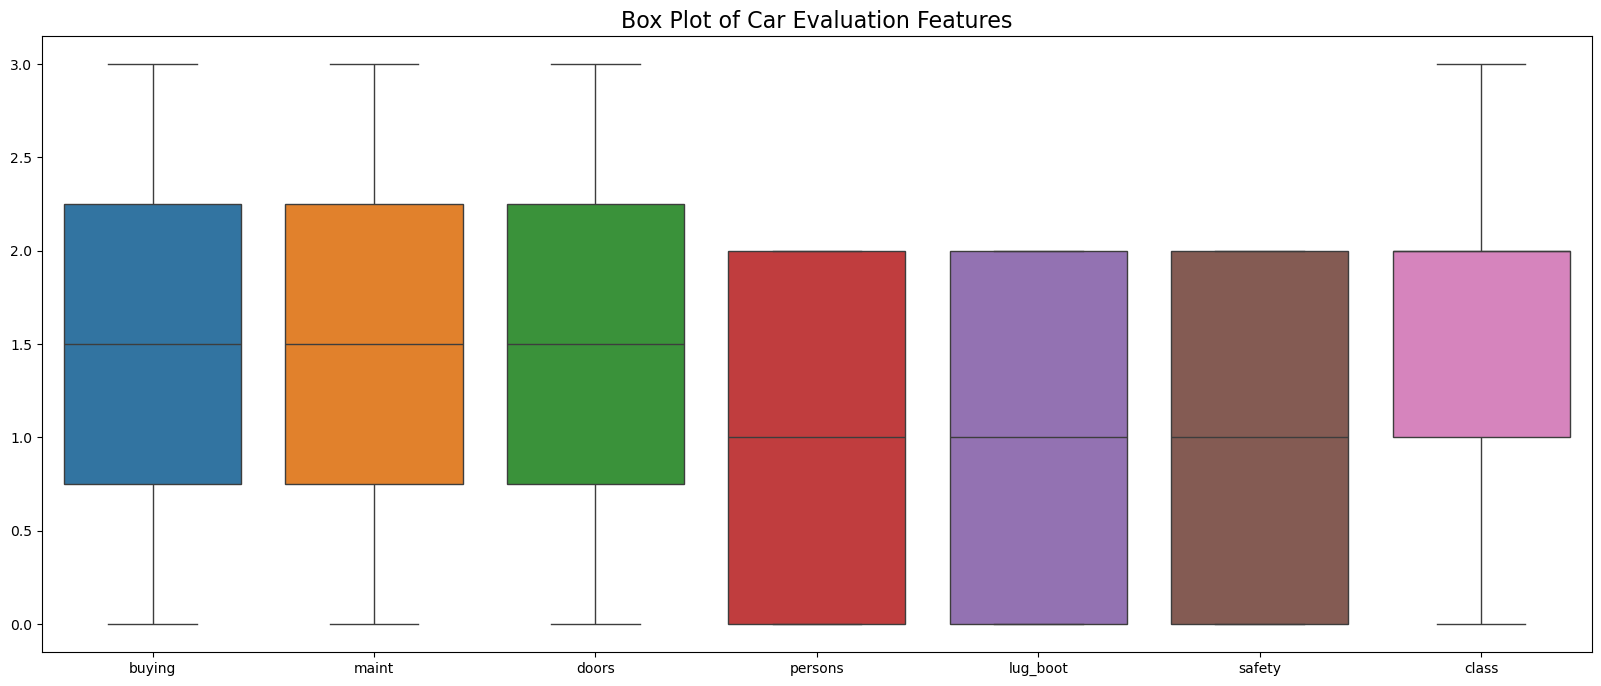

In [233]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=car_df.iloc[:, :],ax=ax)
ax.set_title('Box Plot of Car Evaluation Features', fontsize=16)
plt.show()

In [217]:
#Label encoding
le = LabelEncoder()
#car_df[col] = le.fit_transform(car_df['class'])

for col in car_df.columns:
    car_df[col] = le.fit_transform(car_df[col])
#Ordinal encoding
#ordinal_features = ['buying', 'maint', 'lug_boot', 'safety']
#oe = OrdinalEncoder()
#car_df[ordinal_features] = oe.fit_transform(car_df[ordinal_features])

# Change values for doors and persons
#car_df['doors'] = car_df['doors'].replace('5more', 5).astype(int)
#car_df['persons'] = car_df['persons'].replace('more', 5).astype(int)

In [234]:
X = car_df.drop(columns='class')
y = car_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [235]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f"Logistic Regression Accuracy: {round(accuracy_score(y_test, y_pred_lr)*100,2)}%")

#k-fold Logistic 
k = 5
scores = cross_val_score(lr_model, X, y, cv=k)
print(f"K-fold cross validation accuracy for logistic regression: {scores.mean() * 100:.2f}%")

Logistic Regression Accuracy: 65.9%
K-fold cross validation accuracy for logistic regression: 64.99%


In [236]:
svm_model = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print(f"SVM Accuracy: {round(accuracy_score(y_test, y_pred_svm)*100,2)}%")

#K-fold cross validation
k = 5
scores = cross_val_score(svm_model, X, y, cv=k)
print(f"K-fold cross validation accuracy for SVM: {scores.mean() * 100:.2f}%")

SVM Accuracy: 91.62%
K-fold cross validation accuracy for SVM: 77.09%


In [237]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)
tree_pred=tree_clf.predict(X_test)
print(f"Decision Tree Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%")

#K-fold cross validation
k = 5
scores = cross_val_score(tree_clf, X, y, cv=k)
print(f"K-fold cross validation accuracy for decision tree: {scores.mean() * 100:.2f}%")

Decision Tree Accuracy: 96.24%
K-fold cross validation accuracy for decision tree: 76.91%


In [238]:
mlp_clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print(f"MLP accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%")

#K-fold cross validation
k = 5
scores = cross_val_score(mlp_clf, X, y, cv=k)
print(f"K-fold cross validation accuracy for MLP: {scores.mean() * 100:.2f}%")

C:\Users\Bertilla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP accuracy: 96.24%


C:\Users\Bertilla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Bertilla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Bertilla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Bertilla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


K-fold cross validation accuracy for MLP: 79.46%


C:\Users\Bertilla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
